In [1]:
# Plot the spectrum as a function of viewing angle
# Editing started by MM on 1/13/2015
# converting to ipynb on 4/15/2015

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from astropy.io import ascii
from astropy.convolution import Gaussian1DKernel, convolve, Box1DKernel
from scipy.interpolate import interp1d
from scipy.integrate import quad
from glob import glob

%matplotlib inline

# set some global options
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['legend.frameon'] = False
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['legend.borderpad'] = 0.1
plt.rcParams['legend.labelspacing'] = 0.1
plt.rcParams['legend.handletextpad'] = 0.1
plt.rcParams['font.family'] = 'stixgeneral'
plt.rcParams['font.size'] = 16

## Single spectrum varying viewing angle

In [8]:
# example 
spec = ascii.read("WD06_Spectra/WD06_d20.par")
print np.unique(spec['theta'])
print np.unique(spec['phi'])

 theta  
--------
 14.8351
 39.9445
 55.4819
 68.4899
  80.406
 91.9103
103.4935
115.6794
129.2966
146.4428
 phi  
------
0.1047
 0.733
1.3614
1.9897
 2.618
3.2463
3.8746
4.5029
5.1313
5.7596


10


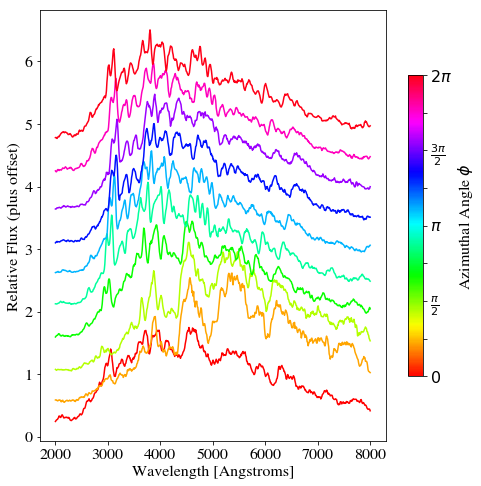

In [11]:
# each Nth entry, gaussian kernal
spec = ascii.read("WD06_Spectra/WD06_d20.par")
dl = spec['lambda'][1] - spec['lambda'][0]
lmax = max(spec['lambda'])
lmin = min(spec['lambda'])

plt.figure(figsize=(7,7))
skip = 1
width = 3 # in 10's of Angstroms (ie nm)
kern = Box1DKernel(width,mode='oversample')


theta_select = 55.4819 
specm = spec[spec['theta'] == theta_select]
angles = np.unique(spec['phi'])


mycolor=plt.cm.hsv
nl = len(angles[::skip])
print nl 


lblist = []
for i,select in enumerate(angles[::skip]) :
    # select the correct spectrum 
    mask = (specm['phi']==select)
    lbol = np.sum(specm[mask]['flux'])*dl
    norm = lbol/(lmax-lmin)
    offset = i/2.
    plt.plot(specm[mask]['lambda'],
             convolve(specm[mask]['flux']/norm + offset,kern,boundary='extend'),
             color=mycolor(1.0*i/(len(angles[::skip])-1)),
             linewidth=1.5
             )
    
    
# create a colorbar
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=0, vmax=2*np.pi))
sm._A = []
cb = plt.colorbar(sm,label=r'Azimuthal Angle $\phi$ ',orientation='vertical',shrink=0.7)

myticks = np.linspace(0.,2.,9)*np.pi
mylabel = [r"$0$","",r"$\frac{\pi}{2}$","",r"$\pi$","",r"$\frac{3 \pi}{2}$","",r"$2 \pi$"]
cb.set_ticks(myticks)
cb.set_ticklabels(mylabel)

plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Relative Flux (plus offset)')
plt.tight_layout(pad=1)
plt.show()
#plt.savefig("spectra_viewing_angle_d20.pdf")

## Spectral timeseries

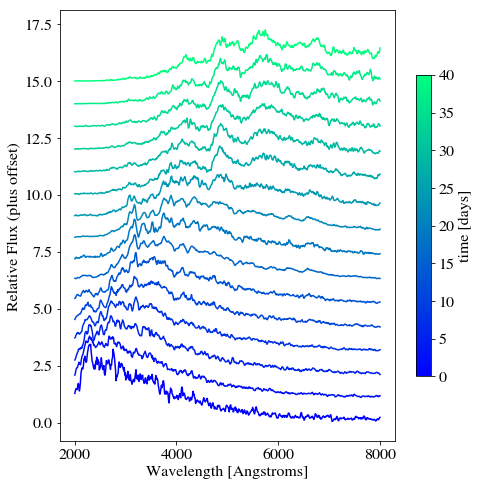

In [12]:
spec_file_list = glob("WD06_spectra/WD06_d[0-9][0-9].par")


plt.figure(figsize=(7,7))

# select a viewing angle
theta_select = 55.4819
phi_select = 4.5029


mycolor=plt.cm.winter
nl = len(spec_file_list)

for i, fn in enumerate(spec_file_list):
    spec = ascii.read(fn)
    dl = spec['lambda'][1] - spec['lambda'][0]
    lmax = max(spec['lambda'])
    lmin = min(spec['lambda'])

    mask = (spec['theta']==theta_select) & (spec['phi']==phi_select)
    lbol = np.sum(spec[mask]['flux'])*dl
    norm = lbol/(lmax-lmin)
    offset = 1.*i
    
    plt.plot(spec[mask]['lambda'],
             convolve(spec[mask]['flux']/norm + offset,kern,boundary='extend'),
             color=mycolor(1.0*i/(nl-1)),
             linewidth=1.5
             )
    
# create a colorbar
sm = plt.cm.ScalarMappable(cmap=mycolor, norm=plt.Normalize(vmin=0, vmax=40))
sm._A = []
cb = plt.colorbar(sm,label=r'time [days]',orientation='vertical',shrink=0.7)


plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Relative Flux (plus offset)')
plt.tight_layout(pad=1)
plt.show()